In [1]:
import pandas as pd
import numpy as np
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


# File Path

file_path ='/home/marshal/protonotebook/Data Mining/Nature-language/AMAZON_FASHION_5.json'

# read JSON file into DataFrame
data = pd.read_json(file_path, lines=True)

# Select only verified Reviews
verified_reviews = data[data.verified == True].copy()

# Eliminate duplicate rows
verified_reviews.drop_duplicates(['reviewerID', 'asin'], keep='first', inplace=True)

# searching for all punctuation
verified_reviews.loc[:, 'punctuation'] = verified_reviews['reviewText'].apply(lambda x: ''.join(set(re.findall(r'[^\w\s]+', str(x)))))

# replace punctuation & with and
verified_reviews.loc[:, 'reviewText']= verified_reviews['reviewText'].apply( lambda x: str(x).replace('&', 'and')) 

# Preprocessed Data
Pre_data = verified_reviews[['overall','reviewText']]

wordnet_lemmatizer = WordNetLemmatizer()  # Initialize WordNet Lemmatizer

def cleaningText(text):
    text = re.sub("[^a-zA-Z0-9]", " ", text)  # Remove Punctuation
    text = re.sub("[0-9]+", "", text)  # Remove Numbers
    text = [wordnet_lemmatizer.lemmatize(word.lower()) for word in word_tokenize(text) if word.lower() not in stopwords.words('english')]
    return " ".join(text)

Pre_data.loc[:, 'clean_review'] = Pre_data['reviewText'].apply(lambda x: cleaningText(str(x)))

# Tokenize clean_review column
#Pre_data.loc[:,'tokenized_review'] = Pre_data['clean_review'].apply(word_tokenize)
Pre_data

/tmp/ipykernel_10633/3272668620.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Pre_data.loc[:, 'clean_review'] = Pre_data['reviewText'].apply(lambda x: cleaningText(str(x)))


,overall,reviewText,clean_review
0,5,Great product and price!,great product price
5,3,Waaay too small. Will use for futur children!,waaay small use futur child
10,2,Relieved my Plantar Fascitis for 3 Days. Then ...,relieved plantar fascitis day unbearable pain ...
11,2,This is my 6th pair and they are the best thin...,th pair best thing ever plantar fasciitis resu...
12,5,We have used these inserts for years. They pr...,used insert year provide great support
...,...,...,...
3171,5,Perfect fit!,perfect fit
3172,5,My favorite cross trainers!,favorite cross trainer
3173,5,Love them fit perfect,love fit perfect
3174,5,Favorite Nike shoe ever! The flex sole is exce...,favorite nike shoe ever flex sole excellent so...


In [2]:
print(Pre_data.overall.value_counts(normalize=True))

overall
5    0.682357
4    0.147985
3    0.104639
1    0.037250
2    0.027768
Name: proportion, dtype: float64


In [3]:
print(Pre_data[Pre_data['overall'] == 2].head(10))

     overall                                         reviewText  \
10         2  Relieved my Plantar Fascitis for 3 Days. Then ...   
11         2  This is my 6th pair and they are the best thin...   
17         2  Relieved my Plantar Fascitis for 3 Days. Then ...   
18         2  This is my 6th pair and they are the best thin...   
39         2  Nice pants but too small for a medium. Return it.   
46         2  Did not fit well. Was not comfortable. Switche...   
65         2  Nice pants but too small for a medium. Return it.   
79         2  I'm not sure I was shipped the correct style. ...   
84         2  I'm not sure I was shipped the correct style. ...   
157        2  These shoes are poorly constructed and I don't...   

                                          clean_review  
10   relieved plantar fascitis day unbearable pain ...  
11   th pair best thing ever plantar fasciitis resu...  
17   relieved plantar fascitis day unbearable pain ...  
18   th pair best thing ever plant

## World Cloud

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
all_text = ' '.join(Pre_data.clean_review.tolist())
all_text[:500]

'great product price waaay small use futur child relieved plantar fascitis day unbearable pain returned full force recommended podiatrist th pair best thing ever plantar fasciitis resultant neuroma unfortunately one ordered smartdestination must second kill foot hard plastic insert rub outside edge foot unable exchange waited one day late use walking shoe used insert year provide great support relieved plantar fascitis day unbearable pain returned full force recommended podiatrist th pair best th'

In [6]:
from wordcloud import WordCloud, STOPWORDS

# specifying stop words
stop_words = set(STOPWORDS)

# Generating the word cloud
word_cloud = WordCloud(width=1600, height=800, stopwords=stop_words).generate(all_text)

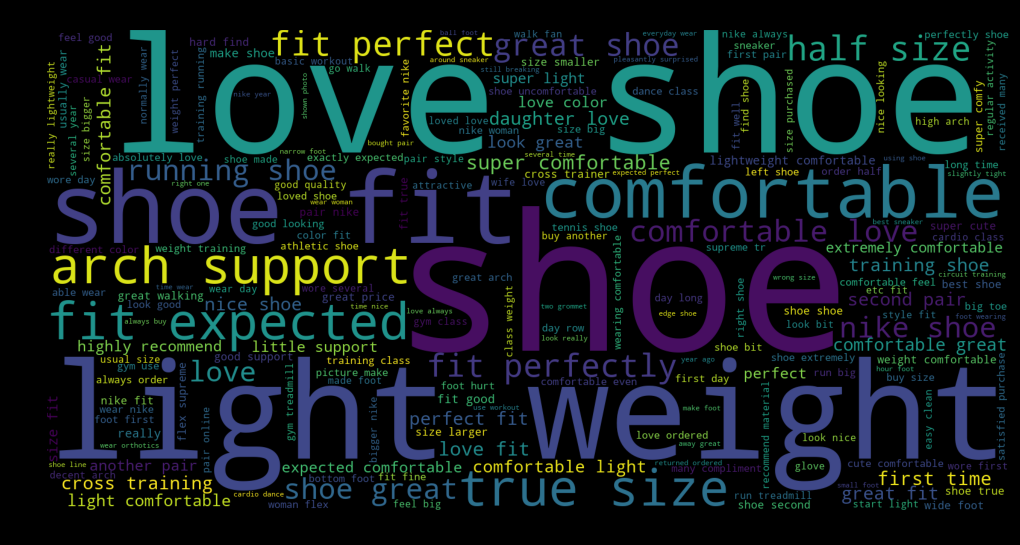

In [7]:
fig = plt.figure(1, figsize=(10, 10), facecolor='k')
plt.title('Amazon Reviews of Grocery and Gourmet Foods')
plt.imshow(word_cloud)
plt.tight_layout(pad=0)
plt.show()

In [8]:
nan_check = Pre_data.isna().sum()
print(nan_check)

overall         0
reviewText      0
clean_review    0
dtype: int64


In [9]:
Cleaned_data=Pre_data[['overall','clean_review']].copy()

In [10]:
Cleaned_data

,overall,clean_review
0,5,great product price
5,3,waaay small use futur child
10,2,relieved plantar fascitis day unbearable pain ...
11,2,th pair best thing ever plantar fasciitis resu...
12,5,used insert year provide great support
...,...,...
3171,5,perfect fit
3172,5,favorite cross trainer
3173,5,love fit perfect
3174,5,favorite nike shoe ever flex sole excellent so...


In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit TF-IDF vectorizer on the preprocessed text data
tfidf_vectorizer.fit(Pre_data['clean_review'])

# Transform the preprocessed text data into TF-IDF features
tfidf_features = tfidf_vectorizer.transform(Cleaned_data['clean_review'])

# Optionally, convert TF-IDF features to array
tfidf_features_array = tfidf_features.toarray()

# Convert TF-IDF features to DataFrame
tfidf_df = pd.DataFrame(tfidf_features_array, columns=tfidf_vectorizer.get_feature_names_out())

# Display the DataFrame
tfidf_df


,abbey,abd,abit,able,absolute,absolutely,absolutly,absorption,accommodate,accurate,...,wow,wrap,wrong,yeah,year,yellow,yellowish,yoga,zero,zumba
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.408703,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2948,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2949,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2950,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2951,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [12]:
import numpy as np
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(tfidf_df, Cleaned_data.overall, test_size=0.30, stratify=Cleaned_data.overall, random_state=42)
y_train.value_counts(), y_test.value_counts()

(overall
 5    1411
 4     306
 3     216
 1      77
 2      57
 Name: count, dtype: int64,
 overall
 5    604
 4    131
 3     93
 1     33
 2     25
 Name: count, dtype: int64)

## Predict New Reviews on LogisticRegression

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# Initialize and train the model (Logistic Regression in this example)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict the target variable on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9616252821670429


## Naive Bayes Model

In [34]:
from sklearn.naive_bayes import MultinomialNB
    
naive_bayes_model = MultinomialNB(alpha=.3, fit_prior=True)

naive_bayes_model.fit(X_train, y_train)

MultinomialNB(alpha=0.3)

In [36]:
from sklearn.metrics import accuracy_score

print("Training Accuracy:", round( accuracy_score(naive_bayes_model.predict(X_train), y_train ), 2) )
print("Test Accuracy:", round( accuracy_score(naive_bayes_model.predict(X_test), y_test ), 2))

Training Accuracy: 0.94
Test Accuracy: 0.93


In [14]:
# Preprocess new reviews
pos_review_processed = cleaningText('I love this shoes')
neg_review_processed = cleaningText('this shoes are small to me')

# Transform preprocessed reviews using the TF-IDF vectorizer
pos_review_tfidf = tfidf_vectorizer.transform([pos_review_processed]).toarray()
neg_review_tfidf = tfidf_vectorizer.transform([neg_review_processed]).toarray()

# Predict sentiments for the transformed reviews using the trained model
pos_sentiment = model.predict(pos_review_tfidf)
neg_sentiment = model.predict(neg_review_tfidf)

print("Predicted sentiment for positive review:", pos_sentiment)
print("Predicted sentiment for negative review:", neg_sentiment)


Predicted sentiment for positive review: [5]
Predicted sentiment for negative review: [3]


/home/marshal/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/marshal/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [24]:

Cleaned_data.loc[:, 'tokenized_reviews'] = Cleaned_data['clean_review'].apply(word_tokenize)
Cleaned_data

,overall,clean_review,tokenized_reviews
0,5,great product price,"[great, product, price]"
5,3,waaay small use futur child,"[waaay, small, use, futur, child]"
10,2,relieved plantar fascitis day unbearable pain ...,"[relieved, plantar, fascitis, day, unbearable,..."
11,2,th pair best thing ever plantar fasciitis resu...,"[th, pair, best, thing, ever, plantar, fasciit..."
12,5,used insert year provide great support,"[used, insert, year, provide, great, support]"
...,...,...,...
3171,5,perfect fit,"[perfect, fit]"
3172,5,favorite cross trainer,"[favorite, cross, trainer]"
3173,5,love fit perfect,"[love, fit, perfect]"
3174,5,favorite nike shoe ever flex sole excellent so...,"[favorite, nike, shoe, ever, flex, sole, excel..."


In [27]:
nan_check = Cleaned_data.isna().sum()
print(nan_check)

overall              0
clean_review         0
tokenized_reviews    0
dtype: int64


In [25]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize

# Train Word2Vec model
word2vec_model = Word2Vec(sentences=tokenized_reviews, vector_size=100, window=5, min_count=1, workers=4)

# Get word vectors
word_vectors = word2vec_model.wv

# Get vocabulary
vocab = word_vectors.key_to_index.keys()

# Create an empty DataFrame to store word vectors
word2vec_df = pd.DataFrame(columns=range(100))  # Assuming vector_size is 100

# Fill the DataFrame with word vectors
for word in vocab:
    word2vec_df.loc[word] = word_vectors[word]

# Display the DataFrame
word2vec_df

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
shoe,-0.227860,0.300324,0.222364,0.026446,-0.092524,-0.744344,0.407185,0.868352,-0.299549,-0.203091,...,0.566269,0.236257,-0.059244,0.172811,0.699628,0.294787,0.227338,-0.261516,0.195815,-0.217414
comfortable,-0.202406,0.257900,0.192628,0.027784,-0.057560,-0.640231,0.343622,0.747203,-0.265506,-0.179650,...,0.482822,0.205620,-0.056921,0.147546,0.578610,0.247159,0.218594,-0.207090,0.153515,-0.182828
fit,-0.172668,0.226836,0.156398,0.018884,-0.036535,-0.542416,0.304130,0.655787,-0.247451,-0.133396,...,0.411168,0.192178,-0.035091,0.125604,0.525907,0.228578,0.176660,-0.183254,0.159378,-0.177454
love,-0.185259,0.236505,0.159812,0.010561,-0.055190,-0.572646,0.307130,0.663274,-0.212250,-0.154923,...,0.415227,0.184726,-0.056672,0.128420,0.531551,0.216289,0.183053,-0.190237,0.151467,-0.182953
great,-0.193691,0.240789,0.171443,0.014329,-0.068981,-0.597959,0.329269,0.707603,-0.245829,-0.151893,...,0.460459,0.180755,-0.042995,0.139129,0.560650,0.216554,0.208104,-0.186325,0.163299,-0.176049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
weather,-0.021097,0.022288,0.014145,0.001690,-0.006114,-0.058126,0.028475,0.052118,-0.016877,-0.005202,...,0.033366,0.013362,-0.008915,0.001276,0.048262,0.020264,0.017223,-0.017212,0.017491,-0.021592
degree,-0.011442,0.029406,0.009091,-0.005615,-0.002343,-0.050594,0.025996,0.052977,-0.027446,-0.007495,...,0.040311,0.024605,-0.004156,0.008042,0.055859,0.022640,0.021005,-0.024242,0.020310,-0.020665
thus,-0.016317,0.024394,0.012385,-0.001625,-0.008019,-0.057723,0.030207,0.050013,-0.011924,-0.016993,...,0.038250,0.016094,-0.004563,0.003237,0.054753,0.012933,0.015450,-0.020426,0.007942,-0.011476
fabric,-0.017022,0.010654,0.015175,0.008791,-0.002487,-0.045792,0.030425,0.049077,-0.022702,-0.014137,...,0.045976,0.006957,-0.007382,0.018723,0.047059,0.013702,0.011943,-0.016468,0.006112,-0.010623


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Prepare feature matrix X and target variable y
X = word2vec_df.values  # Word vectors
y = Cleaned_data['overall']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model (Logistic Regression in this example)
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


In [37]:
print("Shape of word2vec_df:", word2vec_df.shape)
print("Shape of Pre_data:", Cleaned_data.shape)

Shape of word2vec_df: (1161, 100)
Shape of Pre_data: (2953, 4)
